### DATA CLEANING - LAUREN

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pathlib import Path
import pandas as pd
import requests
import json

from api_key import geoapify_key

In [3]:
# Create a file path for melbourne_listings
melb_data = Path('Resources/melbourne_listings.csv')
melb_full_df = pd.read_csv(melb_data)

# Read in the data
melb_full_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1044679652057774327,https://www.airbnb.com/rooms/1044679652057774327,20240316023834,2024-03-18,previous scrape,Jubilee park home,Great location:3mins walking to the large aqua...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,378158616,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
1,38971182,https://www.airbnb.com/rooms/38971182,20240316023834,2024-03-18,city scrape,Furnished accomodation,close to Hawthorn station,NaN,https://a0.muscache.com/pictures/95071a26-902a...,298550539,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,1036489765594430755,https://www.airbnb.com/rooms/1036489765594430755,20240316023834,2024-03-18,city scrape,Lovely Ringwood Studio w/ Ensuite,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,551026724,...,5.00,5.00,5.00,NaN,t,10,0,10,0,1.27
3,28139568,https://www.airbnb.com/rooms/28139568,20240316023834,2024-03-16,previous scrape,Close to Monash Caulfield Short lease!!!,NaN,NaN,https://a0.muscache.com/pictures/48b8ed68-d51c...,212558156,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,572431386115618941,https://www.airbnb.com/rooms/572431386115618941,20240316023834,2024-03-16,city scrape,Selina St Kilda - Bed in 4-Bed Dormitory Room,You'll enjoy your time at this cheerful getaway.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,446636199,...,4.43,4.37,3.97,NaN,t,8,0,4,4,1.21


In [4]:
# Removing irrevalent columns, removed location data except for neighborhood_cleansed and lat, long. Removed host_since as will only look at past years data
melb_filtered_df = melb_full_df.drop(columns=["name", "listing_url", "scrape_id", "last_scraped", "source", "description", "neighborhood_overview", "picture_url", "host_url", "host_name", "host_about", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "host_listings_count", "host_total_listings_count", "host_verifications", "neighbourhood", "neighbourhood_group_cleansed", "calendar_updated", "calendar_last_scraped", "license", "instant_bookable", "minimum_nights", "maximum_nights", "minimum_minimum_nights", "minimum_maximum_nights", "maximum_minimum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "has_availability", "availability_30", "availability_60", "availability_90", "availability_365", "instant_bookable"])
melb_filtered_df.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1044679652057774327,378158616,2020-12-03,"Box Hill South, Australia",within an hour,100%,79%,f,t,t,...,NaN,NaN,NaN,NaN,NaN,2,2,0,0,NaN
1,38971182,298550539,2019-09-28,NaN,a few days or more,0%,0%,f,t,t,...,NaN,NaN,NaN,NaN,NaN,1,0,1,0,NaN
2,1036489765594430755,551026724,2023-12-14,NaN,NaN,NaN,NaN,NaN,t,t,...,5.0,5.0,5.00,5.00,5.00,10,0,10,0,1.27
3,28139568,212558156,2018-08-30,"Melbourne, Australia",NaN,NaN,NaN,f,t,f,...,NaN,NaN,NaN,NaN,NaN,1,0,1,0,NaN
4,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,4.0,4.6,4.43,4.37,3.97,8,0,4,4,1.21


In [5]:
#Removing rows with null values in review scores and host_reponse_time
melb_refined_df = melb_filtered_df.dropna()
#melb_refined_df

In [6]:
def get_distances (api_key, source_coords, target_coords):
    url = f"https://api.geoapify.com/v1/routematrix?apiKey={api_key}"
    headers = {"Content-Type": "application/json"}
    data = {
    "mode": "drive",
    "sources": [{"location": source_coords}],
    "targets": [{"location": target_coords}]
    }
    try:
        resp = requests.post(url, headers=headers, json=data)
        response_data = resp.json()
        distances = response_data["sources_to_targets"][0][0]["distance"]  # Assuming you want the first distance
        return distances
    except requests.exceptions.HTTPError as e:
        print(f"Error: {e.response.text}")
        return None

In [9]:
source_location = [144.9433,-37.8136] #melbourne coordinates
api_key = geoapify_key
distances_from_cbd = []
num=0
for index, row in melb_refined_df.iterrows():
    # get latitude, longitude from the DataFrame
    latitude = row["latitude"]
    longitude = row["longitude"]
    target_location = [longitude,latitude]
    distance = get_distances(api_key, source_location, target_location)
    distances_from_cbd.append(distance)
    num=num +1
    print(f"request {num}")
    print(distance)
melb_refined_df["distances_from_cbd"] = distances_from_cbd
melb_refined_df

request 1
7434
request 2
10140
request 3
1451
request 4
24913
request 5
6951
request 6
3354
request 7
3066
request 8
9389
request 9
5728
request 10
19214
request 11
2008
request 12
12928
request 13
11678
request 14
15905
request 15
12532
request 16
38834
request 17
13034
request 18
51325
request 19
47194
request 20
22965
request 21
14241
request 22
57549
request 23
4186
request 24
11153
request 25
17845
request 26
2293
request 27
2865
request 28
7031
request 29
3852
request 30
15973
request 31
9932
request 32
20629
request 33
22007
request 34
8286
request 35
15578
request 36
28268
request 37
20904
request 38
6047
request 39
22536
request 40
4243
request 41
9976
request 42
7677
request 43
12461
request 44
12784
request 45
20777
request 46
15793
request 47
13137
request 48
33140
request 49
2540
request 50
1862
request 51
8732
request 52
7599
request 53
4668
request 54
8335
request 55
26101
request 56
11991
request 57
31851
request 58
3333
request 59
2631
request 60
60809
request 61
3070


,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distances_from_cbd
4,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,4.60,4.43,4.37,3.97,8,0,4,4,1.21,7434
11,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.20,4.20,4.20,4.20,3,0,3,0,0.81,10140
16,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,5.00,5.00,4.50,4.00,105,105,0,0,0.98,1451
17,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.00,5.00,5.00,5.00,1,0,1,0,1.00,24913
18,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,3.50,4.00,4.00,5.00,7,7,0,0,2.00,6951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25072,30836862,22548036,2014-10-14,"Melbourne, Australia",within a few hours,100%,95%,f,t,t,...,4.80,4.89,4.78,4.53,3,3,0,0,2.74,3351
25078,1061360537948958353,517641271,2023-06-01,"Melbourne, Australia",within an hour,89%,90%,f,t,t,...,3.33,3.67,5.00,3.67,11,11,0,0,3.00,2627
25081,710398956041051683,90729398,2016-08-19,"Victoria, Australia",within a few hours,82%,41%,f,t,t,...,5.00,5.00,5.00,3.00,339,75,262,2,0.08,3196
25082,925945938663212093,516470484,2023-05-25,"Melbourne, Australia",within an hour,100%,93%,t,t,t,...,4.59,4.96,4.98,4.84,5,5,0,0,6.09,1641


In [10]:
#convert distances from cbd to kilometers
melb_refined_df["distances_from_cbd_km"] = melb_refined_df["distances_from_cbd"] / 1000
melb_refined_df

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distances_from_cbd,distances_from_cbd_km
4,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,4.43,4.37,3.97,8,0,4,4,1.21,7434,7.434
11,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.20,4.20,4.20,3,0,3,0,0.81,10140,10.140
16,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,5.00,4.50,4.00,105,105,0,0,0.98,1451,1.451
17,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.00,5.00,5.00,1,0,1,0,1.00,24913,24.913
18,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,4.00,4.00,5.00,7,7,0,0,2.00,6951,6.951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25072,30836862,22548036,2014-10-14,"Melbourne, Australia",within a few hours,100%,95%,f,t,t,...,4.89,4.78,4.53,3,3,0,0,2.74,3351,3.351
25078,1061360537948958353,517641271,2023-06-01,"Melbourne, Australia",within an hour,89%,90%,f,t,t,...,3.67,5.00,3.67,11,11,0,0,3.00,2627,2.627
25081,710398956041051683,90729398,2016-08-19,"Victoria, Australia",within a few hours,82%,41%,f,t,t,...,5.00,5.00,3.00,339,75,262,2,0.08,3196,3.196
25082,925945938663212093,516470484,2023-05-25,"Melbourne, Australia",within an hour,100%,93%,t,t,t,...,4.96,4.98,4.84,5,5,0,0,6.09,1641,1.641


In [11]:
#convert distances from cbd to kilometers
melb_refined_df["distances_from_cbd_km"] = melb_refined_df["distances_from_cbd"] / 1000
melb_refined_df

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distances_from_cbd,distances_from_cbd_km
4,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,4.43,4.37,3.97,8,0,4,4,1.21,7434,7.434
11,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.20,4.20,4.20,3,0,3,0,0.81,10140,10.140
16,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,5.00,4.50,4.00,105,105,0,0,0.98,1451,1.451
17,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.00,5.00,5.00,1,0,1,0,1.00,24913,24.913
18,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,4.00,4.00,5.00,7,7,0,0,2.00,6951,6.951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25072,30836862,22548036,2014-10-14,"Melbourne, Australia",within a few hours,100%,95%,f,t,t,...,4.89,4.78,4.53,3,3,0,0,2.74,3351,3.351
25078,1061360537948958353,517641271,2023-06-01,"Melbourne, Australia",within an hour,89%,90%,f,t,t,...,3.67,5.00,3.67,11,11,0,0,3.00,2627,2.627
25081,710398956041051683,90729398,2016-08-19,"Victoria, Australia",within a few hours,82%,41%,f,t,t,...,5.00,5.00,3.00,339,75,262,2,0.08,3196,3.196
25082,925945938663212093,516470484,2023-05-25,"Melbourne, Australia",within an hour,100%,93%,t,t,t,...,4.96,4.98,4.84,5,5,0,0,6.09,1641,1.641


In [12]:
#categorise the distances from the cbd
distances_from_cbd_categories = []
for index, row in melb_refined_df.iterrows():
    distance_km = row["distances_from_cbd_km"]

    if distance_km < 5:
        category = "less than 5km"
    elif distance_km < 10:
        category = "less than 10km"  
    elif distance_km < 15:
        category = "less than 15km"            
    elif distance_km < 20:
        category = "less than 20km"  
    elif distance_km < 25:
        category = "less than 25km"  
    else:
        category = "greater than 25km"
        
    distances_from_cbd_categories.append(category)

melb_refined_df["distances_from_cbd_category"] = distances_from_cbd_categories
melb_refined_df

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distances_from_cbd,distances_from_cbd_km,distances_from_cbd_category
4,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,4.37,3.97,8,0,4,4,1.21,7434,7.434,less than 10km
11,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.20,4.20,3,0,3,0,0.81,10140,10.140,less than 15km
16,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,4.50,4.00,105,105,0,0,0.98,1451,1.451,less than 5km
17,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.00,5.00,1,0,1,0,1.00,24913,24.913,less than 25km
18,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,4.00,5.00,7,7,0,0,2.00,6951,6.951,less than 10km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25072,30836862,22548036,2014-10-14,"Melbourne, Australia",within a few hours,100%,95%,f,t,t,...,4.78,4.53,3,3,0,0,2.74,3351,3.351,less than 5km
25078,1061360537948958353,517641271,2023-06-01,"Melbourne, Australia",within an hour,89%,90%,f,t,t,...,5.00,3.67,11,11,0,0,3.00,2627,2.627,less than 5km
25081,710398956041051683,90729398,2016-08-19,"Victoria, Australia",within a few hours,82%,41%,f,t,t,...,5.00,3.00,339,75,262,2,0.08,3196,3.196,less than 5km
25082,925945938663212093,516470484,2023-05-25,"Melbourne, Australia",within an hour,100%,93%,t,t,t,...,4.98,4.84,5,5,0,0,6.09,1641,1.641,less than 5km


In [13]:
#remove $ sign from column
melb_refined_df["price"] = melb_refined_df["price"].str.replace('$', '').str.replace(',', '')
#convert price column float
#melb_price_review_df.loc[:,"price"] = pd.to_numeric(melb_price_review_df["price"], errors='coerce')
melb_refined_df["price"] = melb_refined_df["price"].astype("float")
melb_refined_df.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distances_from_cbd,distances_from_cbd_km,distances_from_cbd_category
4,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,4.37,3.97,8,0,4,4,1.21,7434,7.434,less than 10km
11,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.20,4.20,3,0,3,0,0.81,10140,10.140,less than 15km
16,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,4.50,4.00,105,105,0,0,0.98,1451,1.451,less than 5km
17,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.00,5.00,1,0,1,0,1.00,24913,24.913,less than 25km
18,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,4.00,5.00,7,7,0,0,2.00,6951,6.951,less than 10km


In [14]:
#categorise the price per night of the accomodation
price_categories = []
for index, row in melb_refined_df.iterrows():
    price_cat = row["price"]

    if price_cat < 100:
        category = "less than $100"
    elif price_cat < 200:
        category = "less than $200"  
    elif price_cat < 300:
        category = "less than $300"            
    elif price_cat < 400:
        category = "less than $400"  
    elif price_cat < 500:
        category = "less than $500"
    elif price_cat < 600:
        category = "less than $600"
    elif price_cat < 700:
        category = "less than $700"
    elif price_cat < 800:
        category = "less than $800"
    elif price_cat < 900:
        category = "less than $900"
    elif price_cat < 1000:
        category = "less than $1000"
    else:
        category = "greater than $1000"
        
    price_categories.append(category)

melb_refined_df["Price Categories"] = price_categories
melb_refined_df

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distances_from_cbd,distances_from_cbd_km,distances_from_cbd_category,Price Categories
4,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,3.97,8,0,4,4,1.21,7434,7.434,less than 10km,less than $200
11,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.20,3,0,3,0,0.81,10140,10.140,less than 15km,less than $100
16,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,4.00,105,105,0,0,0.98,1451,1.451,less than 5km,less than $200
17,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.00,1,0,1,0,1.00,24913,24.913,less than 25km,less than $200
18,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,5.00,7,7,0,0,2.00,6951,6.951,less than 10km,less than $300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25072,30836862,22548036,2014-10-14,"Melbourne, Australia",within a few hours,100%,95%,f,t,t,...,4.53,3,3,0,0,2.74,3351,3.351,less than 5km,less than $200
25078,1061360537948958353,517641271,2023-06-01,"Melbourne, Australia",within an hour,89%,90%,f,t,t,...,3.67,11,11,0,0,3.00,2627,2.627,less than 5km,less than $200
25081,710398956041051683,90729398,2016-08-19,"Victoria, Australia",within a few hours,82%,41%,f,t,t,...,3.00,339,75,262,2,0.08,3196,3.196,less than 5km,less than $200
25082,925945938663212093,516470484,2023-05-25,"Melbourne, Australia",within an hour,100%,93%,t,t,t,...,4.84,5,5,0,0,6.09,1641,1.641,less than 5km,less than $200


In [15]:
# Creating clean CSV with melbourne data
melb_refined_df.to_csv('Outputs/Melbourne_refined_listings_cleaned.csv', index=False)

### PRICE V LOCATION RI - RACHAEL 

HYPOTHESIS:Airbnb listings in Central areas have higher average nightly Airbnb prices than listings in the outskirts (those outside of the CBD).

Null Hypothesis: There is no effect in the population. Specifically, the mean price of Airbnb accommodations per night is the same in the city as it is in the outskirts.

Alternative Hypothesis (Ha or H1): There is an effect in the population. Specifically, the mean price of Airbnb accommodations per night is different between the city and the outskirts 

Notes around data: 
It should be noted that "City" councils are defined as Melbourne, Yarra, Port Philip, Stonnington, Boroondara, Moreland. 
There are a total of 79 councils in Victoria (regional and Melbourne) This dataset captures 30 of these councils.

In [2]:
#Dependancies and Setup
from pathlib import Path
import pandas as pd
import numpy as np

In [3]:
#Create a Path to the file
Melbourne_data = Path("Outputs/Melbourne_refined_listings_cleaned.csv")

In [4]:
# Read School and Student Data File and store into Pandas DataFrames
Melbourne_Price_Location_data = pd.read_csv(Melbourne_data)

In [5]:
#Test the data has come in properly by printing the first five values.
Melbourne_Price_Location_data.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distances_from_cbd,distances_from_cbd_km,distances_from_cbd_category,Price Categories
0,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,3.97,8,0,4,4,1.21,7434.0,7.434,less than 10km,less than $200
1,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.20,3,0,3,0,0.81,10140.0,10.140,less than 15km,less than $100
2,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,4.00,105,105,0,0,0.98,1451.0,1.451,less than 5km,less than $200
3,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.00,1,0,1,0,1.00,24913.0,24.913,less than 25km,less than $200
4,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,5.00,7,7,0,0,2.00,6951.0,6.951,less than 10km,less than $300


In [6]:
import pandas as pd

# Assuming you already have the "Melbourne_Price_Location_data" DataFrame
# with columns: "Neighbourhood_Cleansed", "Latitude", "Longitude", and "Price"

# Set "Neighbourhood_Cleansed" as the index
Melbourne_Price_Location_data.set_index("neighbourhood_cleansed", inplace=True)

# Create a new DataFrame with selected columns
location_price_df = Melbourne_Price_Location_data[["latitude", "longitude", "price"]]

# Print the first few rows of the new DataFrame
location_price_df

,latitude,longitude,price
neighbourhood_cleansed,,,
Port Phillip,-37.859820,144.977440,123.0
Brimbank,-37.788550,144.844210,50.0
Melbourne,-37.808110,144.949960,166.0
Glen Eira,-37.923756,145.062736,120.0
Port Phillip,-37.833316,144.969121,202.0
...,...,...,...
Melbourne,-37.823820,144.961340,179.0
Melbourne,-37.826868,144.957080,193.0
Melbourne,-37.802340,144.967980,115.0


In [7]:
# Assuming you have a DataFrame called location_price_df
# with an index column named 'neighbourhood_cleansed'

# Get unique neighborhood names from the index
unique_neighborhoods = location_price_df.index.unique()

print("Unique neighborhood names:")
for neighborhood in unique_neighborhoods:
    print(neighborhood)

Unique neighborhood names:
Port Phillip
Brimbank
Melbourne
Glen Eira
Yarra
Darebin
Boroondara
Hobsons Bay
Hume
Stonnington
Yarra Ranges
Bayside
Moreland
Cardinia
Maribyrnong
Manningham
Banyule
Kingston
Whitehorse
Wyndham
Frankston
Moonee Valley
Casey
Melton
Whittlesea
Monash
Nillumbik
Maroondah
Knox
Greater Dandenong


In [8]:
import pandas as pd

# Assuming you have a DataFrame called location_price_df
# with columns: 'neighbourhood_cleansed', 'price'

# Calculate the mean price for each unique neighborhood
mean_prices = location_price_df.groupby('neighbourhood_cleansed')['price'].mean()

print("Mean prices for each neighborhood:")
print(mean_prices)

Mean prices for each neighborhood:
neighbourhood_cleansed
Banyule              180.700000
Bayside              340.980392
Boroondara           231.287938
Brimbank             176.215517
Cardinia             231.490196
Casey                179.762295
Darebin              181.852941
Frankston            238.577381
Glen Eira            211.572650
Greater Dandenong    126.456140
Hobsons Bay          187.362069
Hume                 185.890625
Kingston             283.852564
Knox                 166.767442
Manningham           282.229167
Maribyrnong          185.278884
Maroondah            180.223881
Melbourne            275.624857
Melton               193.875000
Monash               253.559471
Moonee Valley        208.609929
Moreland             148.577367
Nillumbik            273.055556
Port Phillip         293.805508
Stonnington          228.631868
Whitehorse           174.104000
Whittlesea           162.307692
Wyndham              175.856061
Yarra                267.446870
Yarra Ranges  

In [9]:
# Calculate the mode and median for each unique neighborhood
mode_prices = location_price_df.groupby('neighbourhood_cleansed')['price'].apply(lambda x: x.mode().iloc[0])
median_prices = location_price_df.groupby('neighbourhood_cleansed')['price'].median()

print('Mode prices for each neighborhood:')
print(mode_prices)

print('Median prices for each neighborhood:')
print(median_prices)

Mode prices for each neighborhood:
neighbourhood_cleansed
Banyule               50.0
Bayside              200.0
Boroondara            98.0
Brimbank              60.0
Cardinia             200.0
Casey                 60.0
Darebin               70.0
Frankston            120.0
Glen Eira            300.0
Greater Dandenong     46.0
Hobsons Bay          100.0
Hume                  50.0
Kingston              80.0
Knox                 186.0
Manningham           128.0
Maribyrnong          100.0
Maroondah             80.0
Melbourne            258.0
Melton               229.0
Monash                65.0
Moonee Valley        140.0
Moreland              61.0
Nillumbik            100.0
Port Phillip         200.0
Stonnington          140.0
Whitehorse            55.0
Whittlesea            50.0
Wyndham               50.0
Yarra                150.0
Yarra Ranges         250.0
Name: price, dtype: float64
Median prices for each neighborhood:
neighbourhood_cleansed
Banyule              125.0
Bayside          

In [25]:
import pandas as pd


# Calculate the mean price for each unique neighborhood
mean_prices = location_price_df.groupby('neighbourhood_cleansed')['price'].mean()


# Assuming you have calculated mean_prices, mode_prices, and median_prices
# Create a DataFrame to store the results
summary_df = pd.DataFrame(index=mean_prices.index)

# Add mean, mode, and median columns
summary_df['Mean Price'] = mean_prices
summary_df['Mode Price'] = mode_prices
summary_df['Median Price'] = median_prices

# Display the summary DataFrame
summary_df

,Mean Price,Mode Price,Median Price
neighbourhood_cleansed,,,
Banyule,180.700000,50.0,125.0
Bayside,340.980392,200.0,250.0
Boroondara,231.287938,98.0,172.0
Brimbank,176.215517,60.0,111.5
Cardinia,231.490196,200.0,198.5
Casey,179.762295,60.0,169.0
Darebin,181.852941,70.0,142.5
Frankston,238.577381,120.0,182.5
Glen Eira,211.572650,300.0,150.5


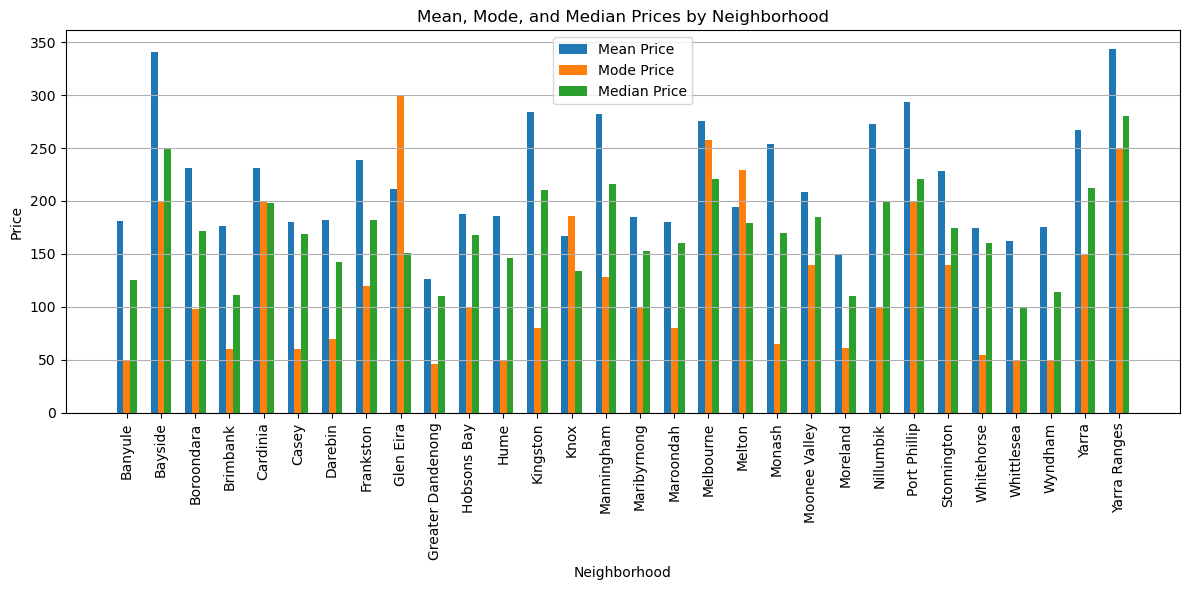

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated mean_prices, mode_prices, and median_prices
x = np.arange(len(mean_prices))  # Create an array of indices for neighborhoods
width = 0.2  # Width of each bar

plt.figure(figsize=(12, 6))

# Plot mean prices
plt.bar(x - width, mean_prices, width, label='Mean Price')

# Plot mode prices
plt.bar(x, mode_prices, width, label='Mode Price')

# Plot median prices
plt.bar(x + width, median_prices, width, label='Median Price')

plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Mean, Mode, and Median Prices by Neighborhood')
plt.xticks(x, mean_prices.index, rotation=90)
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


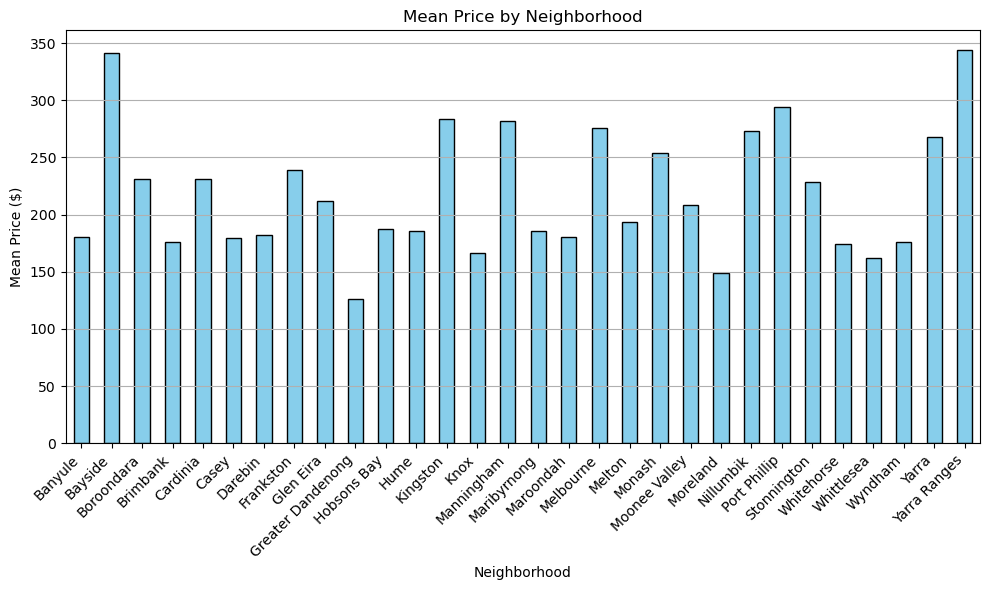

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called location_price_df
# with columns: 'neighbourhood_cleansed', 'price'

# Calculate the mean price for each unique neighborhood
mean_prices = location_price_df.groupby('neighbourhood_cleansed')['price'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price ($)')
plt.title('Mean Price by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

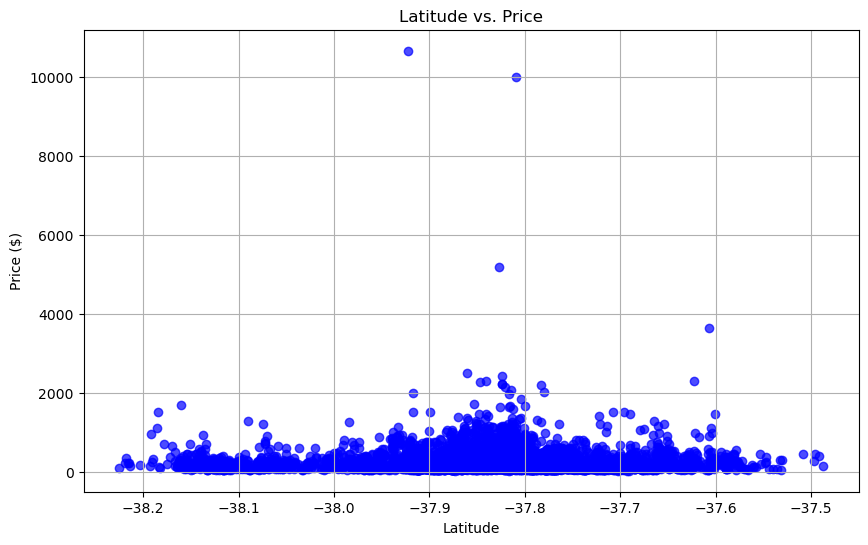

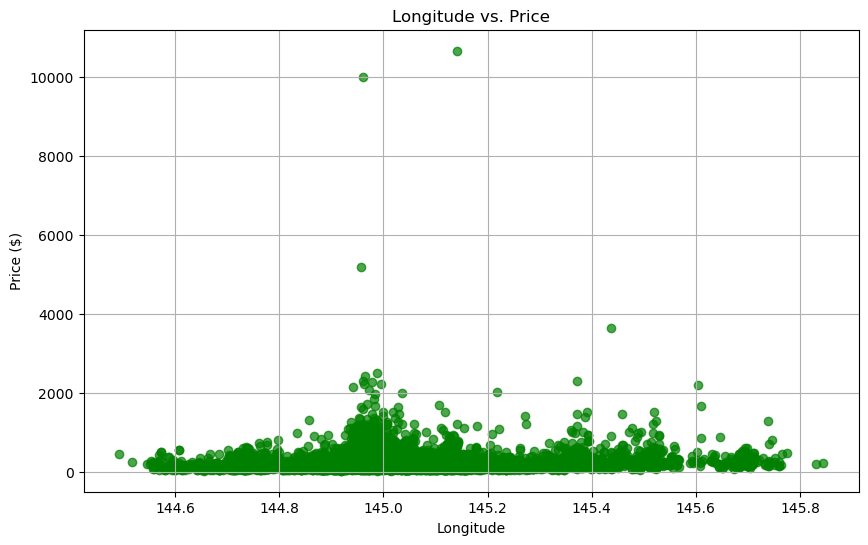

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame called location_price_df
# with columns: 'neighbourhood_cleansed', 'latitude', 'longitude', 'price'

# Calculate the mean price for each unique neighborhood
mean_prices = location_price_df.groupby('neighbourhood_cleansed')['price'].mean()

# Create a scatter plot of latitude vs. price
plt.figure(figsize=(10, 6))
plt.scatter(location_price_df['latitude'], location_price_df['price'], color='b', marker='o', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Price ($)')
plt.title('Latitude vs. Price')
plt.grid(True)
plt.show()

# Create a scatter plot of longitude vs. price
plt.figure(figsize=(10, 6))
plt.scatter(location_price_df['longitude'], location_price_df['price'], color='g', marker='o', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Price ($)')
plt.title('Longitude vs. Price')
plt.grid(True)
plt.show()


In [34]:
from scipy.stats import ttest_ind
import pandas as pd

# Assuming summary_df is properly defined and contains 'neighbourhood_cleansed' and 'Mean Price' columns

# Define the list of "city" councils
city_councils = ['Melbourne', 'Yarra', 'Port Phillip', 'Stonnington']

# Filter prices for "city" councils and other councils
city_prices = summary_df[summary_df['neighbourhood_cleansed'].isin(city_councils)]['Mean Price']
other_prices = summary_df[~summary_df['neighbourhood_cleansed'].isin(city_councils)]['Mean Price']

# Drop NaN values
city_prices = city_prices.dropna().astype(float)
other_prices = other_prices.dropna().astype(float)

# Perform independent samples t-test
try:
    t_stat, p_value = ttest_ind(city_prices, other_prices, equal_var=True)
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}")
except Exception as e:
    print(f"An error occurred: {e}")


t-statistic: 1.9107683783554883
p-value: 0.06632298522623382


The t-statistic of 1.9107 suggests that there is some difference between the mean prices of the councils in city councils and the mean prices of all other councils in this dataset. However, the magnitude of 1.9107 alone doesn't tell us if the difference is statistically significant.

The p-value of 0.0663 indicates that there is a 6.63% chance of observing a t-statistic as extreme as 1.9107 under the null hypothesis. This value is higher than the typical significance level of 0.05, which means there is not enough evidence to reject the null hypothesis at the 0.05 level of significance. Therefore, based on this result alone, we would say that there is not strong evidence to suggest a statistically significant difference in mean prices between the councils in city councils and all other councils in this dataset.
s.

### PROPERTY TYPE ON PRICE  - RHEA 

In [49]:
%matplotlib inline

In [50]:
## STEP 1: SETTING UP

In [51]:
# Import Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [52]:
# Create a path to the file.
Melb_Airbnb = Path("Outputs/Melbourne_refined_listings_cleaned.csv")                                                                                                  

# Read and display the CSV with Pandas
Melb_Airbnb_df = pd.read_csv(Melb_Airbnb)
Melb_Airbnb_df.head() 

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distances_from_cbd,distances_from_cbd_km,distances_from_cbd_category,Price Categories
0,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,3.97,8,0,4,4,1.21,7434,7.434,less than 10km,less than $200
1,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.20,3,0,3,0,0.81,10140,10.140,less than 15km,less than $100
2,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,4.00,105,105,0,0,0.98,1451,1.451,less than 5km,less than $200
3,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.00,1,0,1,0,1.00,24913,24.913,less than 25km,less than $200
4,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,5.00,7,7,0,0,2.00,6951,6.951,less than 10km,less than $300


In [53]:
## STEP 2: DATA CLEANING & PREPARATION

In [54]:
# Check for missing values
print(Melb_Airbnb_df.isnull().sum())

# Drop rows with missing values in 'price' & 'property_type' columns
Melb_Airbnb_df = Melb_Airbnb_df.dropna(subset=['price', 'property_type'])

# Convert price to numeric if it's not already 
Melb_Airbnb_df['price'] = pd.to_numeric(Melb_Airbnb_df['price'], errors='coerce') #errors='coerce' to convert invalid values to NaN, ensuring clean numeric data and better data handling

# Check the data types
print(Melb_Airbnb_df.dtypes)

id                                              0
host_id                                         0
host_since                                      0
host_location                                   0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0


In [55]:
# Convert price to numeric 
Melb_Airbnb_df['price'] = pd.to_numeric(Melb_Airbnb_df['price'], errors='coerce') #errors='coerce' to convert invalid values to NaN, ensuring clean numeric data and better data handling

In [56]:
# Inspecting the first few rows of the 'price' column
print(Melb_Airbnb_df['price'].head(20))

0     123.0
1      50.0
2     166.0
3     120.0
4     202.0
5      80.0
6     579.0
7      75.0
8     104.0
9      55.0
10    171.0
11    175.0
12    150.0
13     50.0
14    235.0
15    284.0
16    968.0
17    600.0
18    220.0
19    231.0
Name: price, dtype: float64


In [57]:
# Print the unique values in the 'price' column to diagnose the issue
print(Melb_Airbnb_df['price'].unique())

[  123.    50.   166.   120.   202.    80.   579.    75.   104.    55.
   171.   175.   150.   235.   284.   968.   600.   220.   231.   215.
   141.   266.    46.   176.   300.   148.   637.    40.   525.    39.
   203.   302.   500.    57.   189.   140.   200.   291.   240.    28.
    70.    85.   415.   556.   586.   252.   905.    95.    56.    49.
   303.   931.   180.   325.   110.    52.   174.    71.   142.   367.
    65.   287.    98.   486.   330.    91.    90.   164.   134.   188.
    92.   436.   107.   154.   230.   309.   334.   222.   128.   911.
    63.   249.   118.   272.    51.   229.   233.   250.   263.   206.
   211.    81.   400.   356.   151.   224.   850.   115.   315.   100.
   536.   109.    78.   297.    45.    94.   343.   221.   156.  1131.
   337.   395.   130.   336.   352.   363.   184.   214.   193.   298.
   342.    59.   638.   679.   469.   373.   173.   161.   270.   350.
   146.    61.   247.   232.   345.   237.   280.   196.   278.   179.
   213

In [58]:
# If the 'price' column contains symbols like $, remove them
Melb_Airbnb_df['price'] = Melb_Airbnb_df['price'].replace('[\$,]', '', regex=True)

# Convert 'price' to numeric
Melb_Airbnb_df['price'] = pd.to_numeric(Melb_Airbnb_df['price'], errors='coerce')

# Inspect the first few rows of the 'price' column
print(Melb_Airbnb_df['price'].head(20))

0     123.0
1      50.0
2     166.0
3     120.0
4     202.0
5      80.0
6     579.0
7      75.0
8     104.0
9      55.0
10    171.0
11    175.0
12    150.0
13     50.0
14    235.0
15    284.0
16    968.0
17    600.0
18    220.0
19    231.0
Name: price, dtype: float64


In [59]:
# Define the correct path to the CSV file
file_path = 'Outputs/Melbourne_refined_listings_cleaned.csv'

# Read the CSV file without inferring data types
Melb_Airbnb_df = pd.read_csv(file_path, dtype=str)

# Print the first few rows of the 'price' column to inspect its raw values
print(Melb_Airbnb_df['price'].head(20))

0     123.0
1      50.0
2     166.0
3     120.0
4     202.0
5      80.0
6     579.0
7      75.0
8     104.0
9      55.0
10    171.0
11    175.0
12    150.0
13     50.0
14    235.0
15    284.0
16    968.0
17    600.0
18    220.0
19    231.0
Name: price, dtype: object


In [60]:
# Ensure the 'price' column is read as a string and clean the values
Melb_Airbnb_df['price'] = Melb_Airbnb_df['price'].astype(str).str.strip().str.replace('$', '').str.replace(',', '')

# Convert the 'price' column to numeric
Melb_Airbnb_df['price'] = pd.to_numeric(Melb_Airbnb_df['price'], errors='coerce')

# Verify the conversion by inspecting the first few rows of the 'price' column
print(Melb_Airbnb_df['price'].head(20))

0     123.0
1      50.0
2     166.0
3     120.0
4     202.0
5      80.0
6     579.0
7      75.0
8     104.0
9      55.0
10    171.0
11    175.0
12    150.0
13     50.0
14    235.0
15    284.0
16    968.0
17    600.0
18    220.0
19    231.0
Name: price, dtype: float64


In [61]:
## STEP 3: EXPLORATORY DATA ANALYSIS

In [62]:
Melb_Airbnb_df['property_type'].nunique()

70

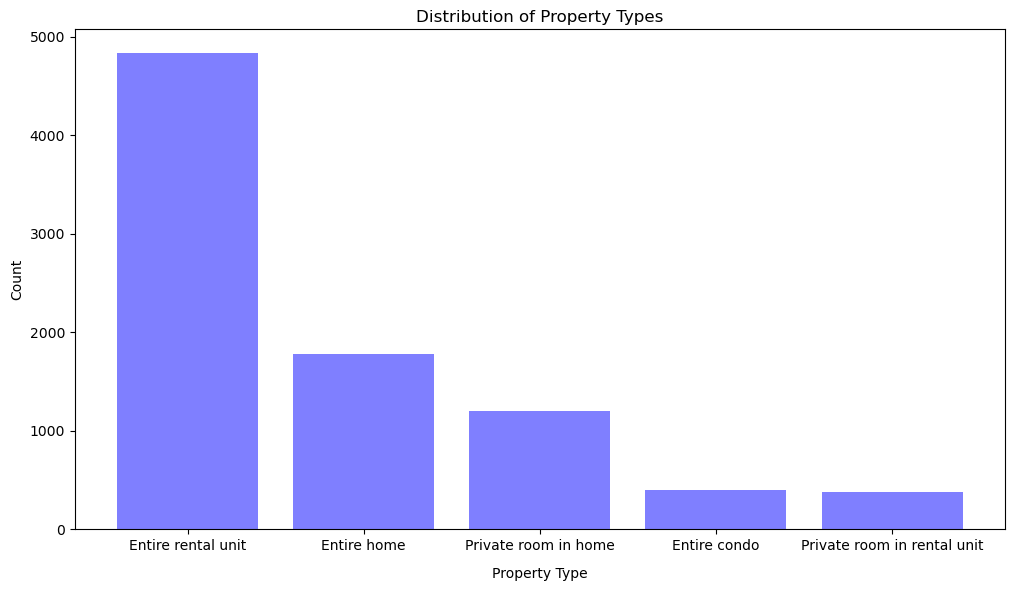

In [63]:
# Define x and y values for top 5 property types
property_counts = Melb_Airbnb_df['property_type'].value_counts().nlargest(5)
x_axis = property_counts.index
y_axis = property_counts.values


# Distribution of property types via Bar graph
plt.figure(figsize=(12, 6.5))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align='center')
plt.title('Distribution of Property Types', pad=5)
plt.xlabel('Property Type', labelpad=10)
plt.ylabel('Count')

  #tick locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation=0)

plt.show()

<Figure size 1200x800 with 0 Axes>

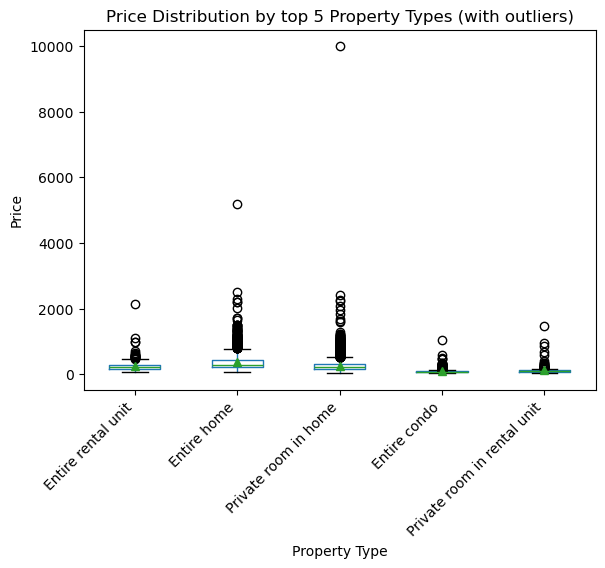

<Figure size 1200x800 with 0 Axes>

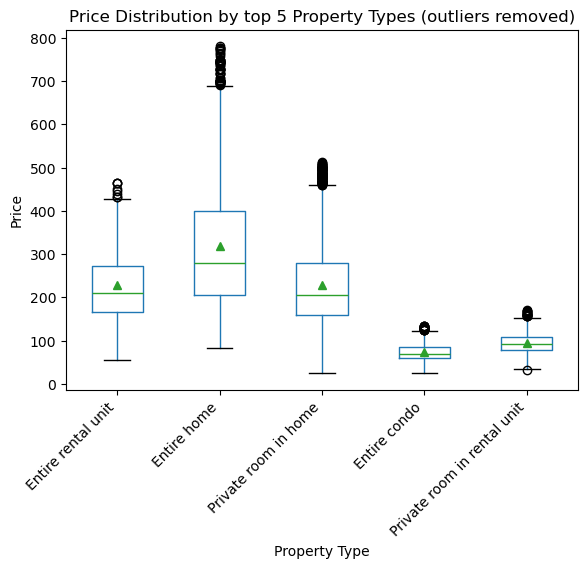

In [64]:
# If the 'price' column contains symbols like $, remove them
Melb_Airbnb_df['price'] = Melb_Airbnb_df['price'].replace('[\$,]', '', regex=True)

# Convert 'price' to numeric
Melb_Airbnb_df['price'] = pd.to_numeric(Melb_Airbnb_df['price'], errors='coerce')


## Boxplot of prices by top 5 property types (WITH OUTLIERS): 

# Filter the DataFrame to only include the top 5 property types
top_5_property_types = Melb_Airbnb_df[Melb_Airbnb_df['property_type'].isin(x_axis)]  


# Boxplot of prices by top 5 property types without outliers
plt.figure(figsize=(12, 8))
top_5_property_types.boxplot(column='price', by='property_type', grid=False, showmeans=True)
plt.title('Price Distribution by top 5 Property Types (with outliers)')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.suptitle('')  # Suppress the default title to clean up the plot

# Ensure the labels are correctly aligned with the plots
plt.xticks(range(1, len(x_axis) + 1), x_axis, rotation=45, ha='right')


## Boxplot of prices by top 5 property types (WITHOUT OUTLIERS): 

# Filter out outliers for each property type
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

# filtered_data = top_5_property_types.groupby('property_type', group_keys=False).apply(remove_outliers, 'price').reset_index(drop=True)


filtered_data = top_5_property_types.groupby('property_type').apply(remove_outliers, 'price').reset_index(drop=True)

plt.figure(figsize=(12, 8))
filtered_data.boxplot(column='price', by='property_type', grid=False, showmeans=True)
plt.title('Price Distribution by top 5 Property Types (outliers removed)')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.suptitle('')  # Suppress the default title to clean up the plot

# Ensure the labels are correctly aligned with the plots
plt.xticks(range(1, len(x_axis) + 1), x_axis, rotation=45, ha='right')


plt.show()   

In [65]:
## STEP 4: HYPOTHESIS TESTING USING ANOVA 

In [66]:
# Extract prices for the top 5 property types
top_5_property_types = Melb_Airbnb_df['property_type'].value_counts().nlargest(5).index
prices_by_property_type = [Melb_Airbnb_df[Melb_Airbnb_df['property_type'] == property_type]['price'] for property_type in top_5_property_types]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*prices_by_property_type)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in prices across different property types.")
else:
    print("There is no significant difference in prices across different property types.")

F-statistic: 367.28832317468897
P-value: 1.9034920018749521e-292
There is a significant difference in prices across different property types.


## HYPOTHESIS: Entire homes/apartments are priced higher than private or shared rooms

# NULL HYPOTHESIS (𝐻0): 
There is no significant difference in the average prices between different property types (entire homes, private rooms, shared rooms, etc.).


# ALTERNATE HYPOTHESIS (𝐻1):
There is a significant difference in the average prices between different property types.


## INTERPRETATION OF ANOVA RESULTS:

Since the p-value < 0.05, we reject the null hypothesis, in favour of the alternate hypothesis. This suggests that there is a significant difference in the prices across different property types.

Therefore, this would support the hypothesis that entire homes/apartments are priced higher than private or shared rooms

In [67]:
## STEP 5: VISUALISE THE RESULTS 

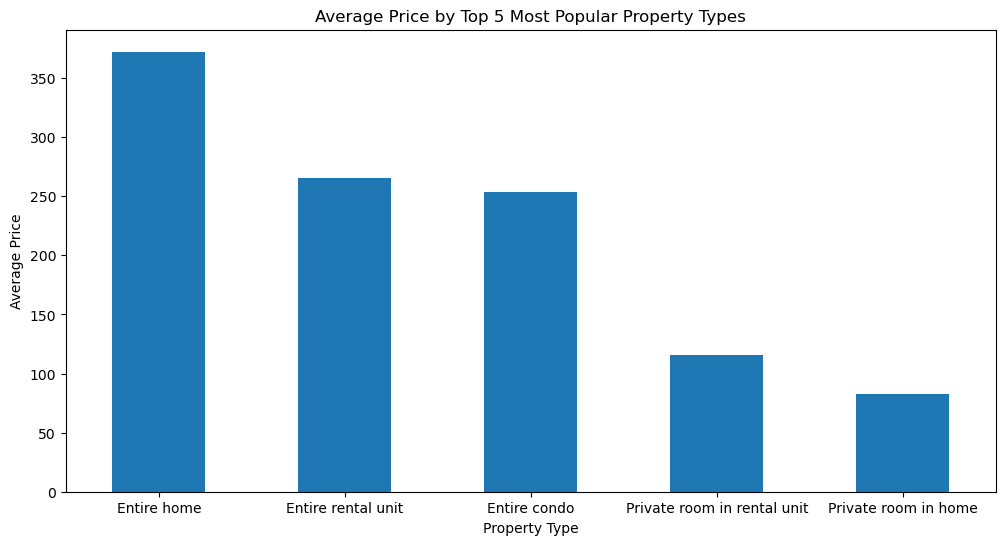

In [68]:
# Get the top 5 most popular property types
top_5_property_types = Melb_Airbnb_df['property_type'].value_counts().nlargest(5).index

# Calculate average price for each of the top 5 property types
average_prices = Melb_Airbnb_df[Melb_Airbnb_df['property_type'].isin(top_5_property_types)].groupby('property_type')['price'].mean().sort_values(ascending=False)

# Bar chart of average prices by top 5 most popular property types
plt.figure(figsize=(12, 6))
average_prices.plot(kind='bar')
plt.title('Average Price by Top 5 Most Popular Property Types')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

### AMENITIES VS PRICE - RHEA

In [69]:
## STEP 1: EXPLORATORY DATA ANALYSIS & HYPOTHESIS TESTING

T-statistic: 4.351066495860205
P-value: 1.367612706353268e-05


<Figure size 800x600 with 0 Axes>

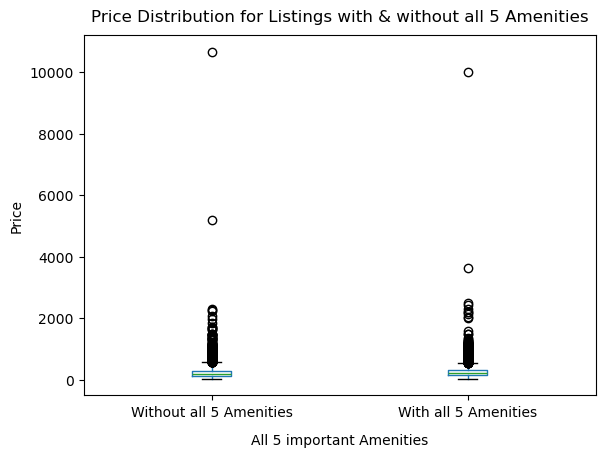

<Figure size 800x600 with 0 Axes>

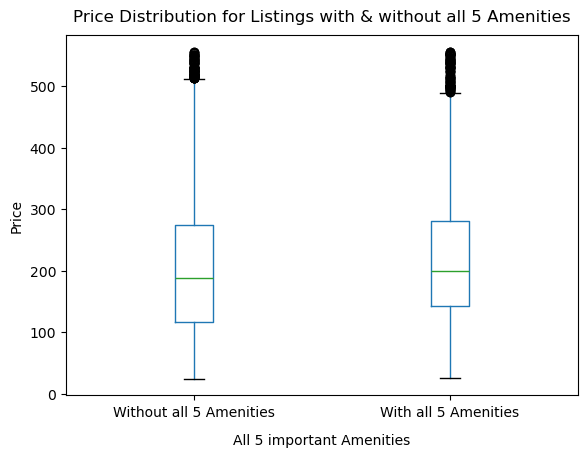

In [70]:
# Select 5 important amenities
important_amenities = ['Wifi', 'Kitchen', 'Essentials', 'Air conditioning', 'Heating']

# Create columns for the selected amenities
for amenity in important_amenities:
 Melb_Airbnb_df[amenity] = Melb_Airbnb_df['amenities'].str.contains(amenity, na=False)

# Determine if a listing has all 5 important amenities
Melb_Airbnb_df['All_Important_Amenities'] = Melb_Airbnb_df[important_amenities].all(axis=1)

# Prepare data for analysis
prices_with_all_amenities = Melb_Airbnb_df[Melb_Airbnb_df['All_Important_Amenities'] == True]['price']
prices_without_all_amenities = Melb_Airbnb_df[Melb_Airbnb_df['All_Important_Amenities'] == False]['price']

# Perform t-test
t_stat, p_value = stats.ttest_ind(prices_with_all_amenities.dropna(), prices_without_all_amenities.dropna())

# Print t-test results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

## Boxplot of prices for listings with and without all 5 important amenities (WITH OUTLIERS) 

plt.figure(figsize=(8, 6))
Melb_Airbnb_df.boxplot(column='price', by='All_Important_Amenities', grid=False)
plt.title('Price Distribution for Listings with & without all 5 Amenities',  pad=10)
plt.xlabel('All 5 important Amenities', labelpad=10)  # To adjust and separate the X-label
plt.ylabel('Price')
plt.suptitle('')  # Suppress the default title to clean up the plot
plt.xticks([1, 2], ['Without all 5 Amenities', 'With all 5 Amenities'])


## Boxplot of prices for listings with and without all 5 important amenities (WITHOUT OUTLIERS) 

# Filter out outliers 
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

filtered_data = remove_outliers(Melb_Airbnb_df, 'price')


# Boxplot of prices for listings with and without all 5 important amenities (WITH OUTLIERS) 
plt.figure(figsize=(8, 6))
filtered_data.boxplot(column='price', by='All_Important_Amenities', grid=False)
plt.title('Price Distribution for Listings with & without all 5 Amenities',  pad=10)
plt.xlabel('All 5 important Amenities', labelpad=10)  # To adjust and separate the X-label
plt.ylabel('Price')
plt.suptitle('')  # Suppress the default title to clean up the plot
plt.xticks([1, 2], ['Without all 5 Amenities', 'With all 5 Amenities'])
plt.show()

## HYPOTHESIS: 

# Null Hypothesis (H0): 
There is no significant difference in the prices of listings with all 5 important amenities and those without all 5 important amenities.

# Alternative Hypothesis (H1): 
There is a significant difference in the prices of listings with all 5 important amenities and those without all 5 important amenities.

# ANOVA Test Results
F-statistic: 18.93
P-value: 1.37e-05

# Interpretation
Since the P-value is less than 0.05, we reject the null hypothesis and coclude that there is a difference in the prices of listings with all 5 important amenities compared to those without all 5 important amenities.

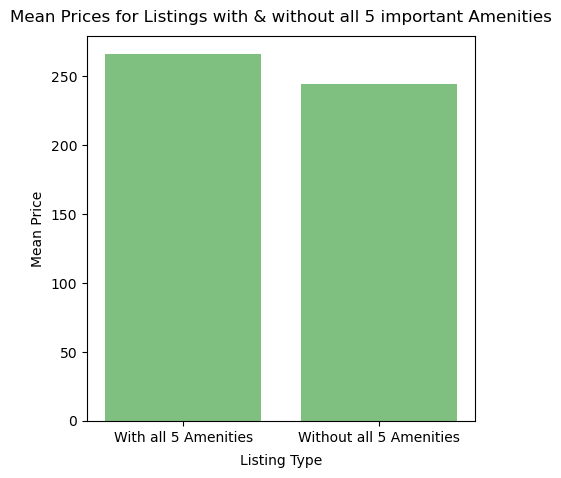

In [72]:
# Visualize the mean prices for listings with and without all 5 important amenities
mean_price_with_all = prices_with_all_amenities.mean()
mean_price_without_all = prices_without_all_amenities.mean()

plt.figure(figsize=(5, 5))
plt.bar(['With all 5 Amenities', 'Without all 5 Amenities'], [mean_price_with_all, mean_price_without_all], color='g', alpha=0.5)
plt.title('Mean Prices for Listings with & without all 5 important Amenities', pad=10) # 'pad' creates distance between title and graph
plt.xlabel('Listing Type', labelpad=7) # 'labelpad' create distance between x-label and x-ticks
plt.ylabel('Mean Price')
plt.show()

# CONCLUSION
Listings that have all the 5 important amenities (Wi-fi, Kitchen, Essentials, Air conditioning and Heating), tend to have different (generally higher) prices compared to those that do not have all 5 important amenities.

### PRICE VS REVIEW SCORE VS REVIEWS PER MONTH ANALYSIS - LAUREN 

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import linregress


In [75]:
#import filtered csv files
melb_data = Path('Outputs/Melbourne_refined_listings_cleaned.csv')
melb_df = pd.read_csv(melb_data)

# Read in the data.
melb_df.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distances_from_cbd,distances_from_cbd_km,distances_from_cbd_category,Price Categories
0,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,3.97,8,0,4,4,1.21,7434,7.434,less than 10km,less than $200
1,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.20,3,0,3,0,0.81,10140,10.140,less than 15km,less than $100
2,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,4.00,105,105,0,0,0.98,1451,1.451,less than 5km,less than $200
3,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.00,1,0,1,0,1.00,24913,24.913,less than 25km,less than $200
4,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,5.00,7,7,0,0,2.00,6951,6.951,less than 10km,less than $300


In [76]:
#Refining columns to be related to price and reviews
melb_price_review_df = melb_df[["id", "price", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]]

melb_price_review_df.head()

,id,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,572431386115618941,123.0,4.2,4.27,4.0,4.6,4.43,4.37,3.97,1.21
1,727686708237430703,50.0,4.2,4.20,4.2,4.2,4.20,4.20,4.20,0.81
2,1051913801382467131,166.0,4.5,4.50,5.0,5.0,5.00,4.50,4.00,0.98
3,1106234039745058155,120.0,5.0,5.00,5.0,5.0,5.00,5.00,5.00,1.00
4,1053974246558615906,202.0,4.5,5.00,4.0,3.5,4.00,4.00,5.00,2.00


In [77]:
# Mean, median, mode for Price
price_mean = round(melb_price_review_df["price"].astype("float").mean(), 2)
price_median = round(melb_price_review_df["price"].astype("float").median(), 2)
price_mode = round(melb_price_review_df["price"].astype("float").mode(), 2)

print(f"Price Mean: {price_mean}")
print(f"Price Median: {price_median}")
print(f"Price mode: {price_mode}")

Price Mean: 252.05
Price Median: 200.0
Price mode: 0    200.0
Name: price, dtype: float64


In [78]:
# Mean, median, mode for Review Scores Rating
review_scores_rating_mean = round(melb_price_review_df["review_scores_rating"].astype("float").mean(), 2)
review_scores_rating_median = round(melb_price_review_df["review_scores_rating"].astype("float").median(), 2)
review_scores_rating_mode = round(melb_price_review_df["review_scores_rating"].astype("float").mode(), 2)

print(f"Review Scores Rating Mean: {review_scores_rating_mean}")
print(f"Review Scores Rating Median: {review_scores_rating_median}")
print(f"Review Scores Rating mode: {review_scores_rating_mode}")

Review Scores Rating Mean: 4.73
Review Scores Rating Median: 4.85
Review Scores Rating mode: 0    5.0
Name: review_scores_rating, dtype: float64


In [79]:
# Mean, median, mode for Reviews Per Month
reviews_per_month_mean = round(melb_price_review_df["reviews_per_month"].astype("float").mean(), 2)
reviews_per_month_median = round(melb_price_review_df["reviews_per_month"].astype("float").median(), 2)
reviews_per_month_mode = round(melb_price_review_df["reviews_per_month"].astype("float").mode(), 2)

print(f"Reviews Per Month Mean: {reviews_per_month_mean}")
print(f"Reviews Per Month Median: {reviews_per_month_median}")
print(f"Reviews Per Month mode: {reviews_per_month_mode}")

Reviews Per Month Mean: 1.8
Reviews Per Month Median: 1.38
Reviews Per Month mode: 0    1.0
Name: reviews_per_month, dtype: float64


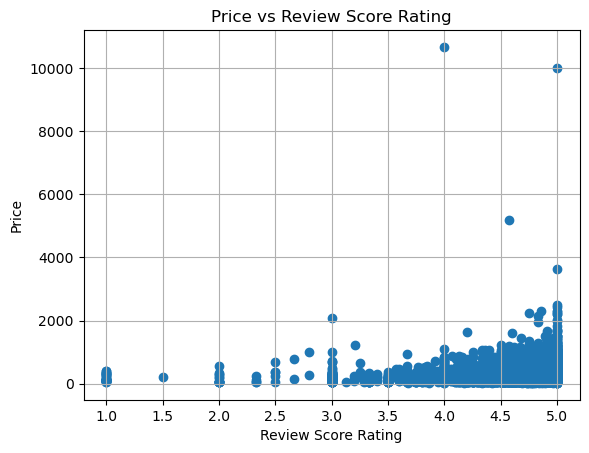

In [80]:
price = melb_price_review_df["price"]
review_score = melb_price_review_df["review_scores_rating"]

plt.scatter(review_score, price, marker="o")

plt.grid()
plt.xlabel("Review Score Rating")
plt.ylabel("Price")
plt.title("Price vs Review Score Rating")

plt.show()

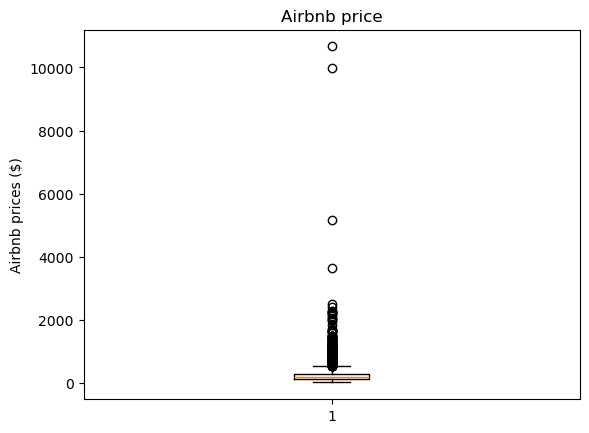

In [81]:
# Create boxplot to see if any outliers in price data
fig1, ax1 =plt.subplots()
ax1.set_title('Airbnb price')
ax1.set_ylabel('Airbnb prices ($)')
ax1.boxplot(price)
plt.show()

In [82]:
# Identify the upper and lower bounds of the data using the quartiles and interquartile range
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 130.0
The upper quartile of temperatures is: 300.5
The interquartile range of temperatures is: 170.5
The the median of temperatures is: 200.0 
Values below -125.75 could be outliers.
Values above 556.25 could be outliers.


In [83]:
#Create filtered dataframe that only has values within the upper and lower bound (lower bound can be ignored as it is below 0)
melb_outliers_removed_df = melb_price_review_df.loc[melb_price_review_df["price"] <= upper_bound]

Price vs Review Scores:
Hypothesis: If the price of Airbnb properties are related to the review score of that property, then as the price of the property increases, so will the review scores of those properties.

Null Hypothesis: As the price of airbnb properties increase, no improvement will be observed in the review scores of those properties.

Alternative Hypothesis: As the price of airbnb properties increases, the review scores of those properties will increase.

the r^2 value is: 0.0016585146011254984
p value is: 5.408380363184123e-05


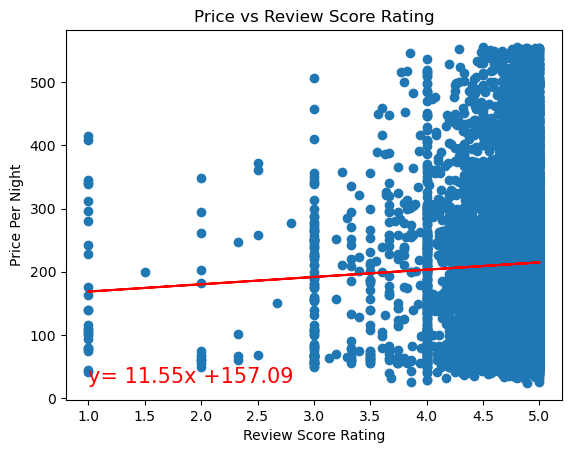

In [84]:
#conduct linear regression of price vs review score rating

x_values = melb_outliers_removed_df["review_scores_rating"]
y_values = melb_outliers_removed_df["price"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, slope * x_values + intercept, color = 'red')
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.xlabel("Review Score Rating")
plt.ylabel("Price Per Night")
plt.title("Price vs Review Score Rating")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")

plt.savefig("Outputs/PriceVsReviewRating.png")

print(f"the r^2 value is: {rvalue**2}")
print(f"p value is: {pvalue}")

Price vs Review Scores Results:

The linear regression is modelling the review score rating of an airbnb against the price of that property. It identified that there is a very weak positive correlation between the two variables as the r^2 value for both is only just below 0.05. The p-value for this regression is quite small (5.41x10^-5) which suggests that the null hypothesis is rejected in favour of the alternative hypothesis.

Price vs Reviews Per Month:

Hypothesis: If the price of Airbnb properties are related to the rate of reviews per month of that property, then as the price of the property increases, so will the reviews per month of those properties.

Null Hypothesis: As the price of airbnb properties increase, no improvement will be observed in the reviews per month of those properties.

Alternative Hypothesis: As the price of airbnb properties increases, the reviews per month of those properties will increase.

the r^2 value is: 4.044064934482127e-06
p value is: 0.8420471427541221


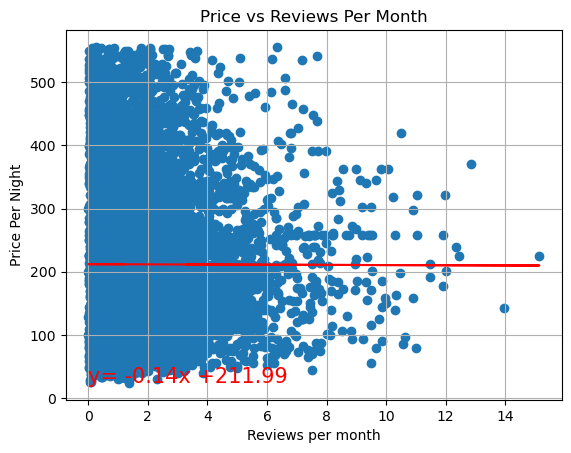

In [85]:
#conduct linear regression of price vs reviews per month
y_values = melb_outliers_removed_df["price"]
x_values = melb_outliers_removed_df["reviews_per_month"]


plt.grid()
plt.xlabel("Reviews per month")
plt.ylabel("Price Per Night")
plt.title("Price vs Reviews Per Month")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, slope * x_values + intercept, color = 'red')
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")
print(f"the r^2 value is: {rvalue**2}")
print(f"p value is: {pvalue}")
plt.show()

Price vs Reviews Per Month:

The linear regression is modelling reviews of an airbnb per month against the price of that property. It identified that there is an extremely weak negative correlation between the two variables as the r^2 value for both is only just above 0. The p-value for this regression is large (0.84) which suggests that the null hypothesis cannot be rejected in favour of the alternative hypothesis. This suggests that nay differences or effects are likely due to random variation.

Review Score Rating vs Reviews Per Month:

Hypothesis: If the review score of Airbnb properties are related to the rate of reviews per month of that property, then as the review rate increases, so will the review scores of those properties.

Null Hypothesis: As the review rate per month of airbnb properties increase, no improvement will be observed in the review scores of those properties.

Alternative Hypothesis: As the review rate per month of airbnb properties increases, the review scores of those properties will increase.

the r^2 value is: 0.027482738395374587
p value is: 2.0869184177680977e-65


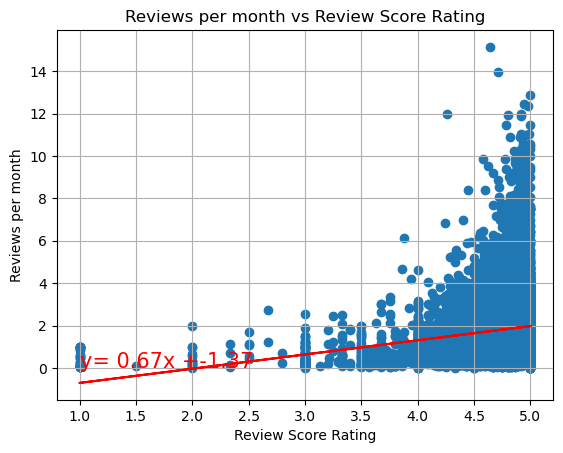

In [86]:
#conduct linear regression of review score rating vs reviews per month
Reviews_per_month = melb_price_review_df["reviews_per_month"]
review_score = melb_price_review_df["review_scores_rating"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(review_score, Reviews_per_month)

plt.scatter(review_score, Reviews_per_month)
plt.plot(review_score, slope * review_score + intercept, color = 'red')
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq, (review_score.min(), Reviews_per_month.min()), fontsize=15, color="red")
plt.grid()
plt.xlabel("Review Score Rating")
plt.ylabel("Reviews per month")
plt.title("Reviews per month vs Review Score Rating")

print(f"the r^2 value is: {rvalue**2}")
print(f"p value is: {pvalue}")

plt.show()

Reviews Per Month vs Review Score Rating:

The linear regression is modelling reviews of an airbnb per month against the review score rating of that property. It identified that there is a very weak positive correlation between the two variables as the r^2 value for both is below 0.05. The p-value for this regression is very small (2.08x10^-65) which suggests that the null hypothesis is rejected in favour of the alternative hypothesis.

### HOST CHARACTERISTICS VS PRICE - MONICA

In [109]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind
import  statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
# File to load
Melbourne_refined_listings_cleaned = Path ("Outputs/Melbourne_refined_listings_cleaned.csv")

# Read Melbourne_refined_listings_cleaned data
airbnb_data = pd.read_csv(Melbourne_refined_listings_cleaned)
airbnb_data.head()


,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distances_from_cbd,distances_from_cbd_km,distances_from_cbd_category,Price Categories
0,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,3.97,8,0,4,4,1.21,7434,7.434,less than 10km,less than $200
1,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.20,3,0,3,0,0.81,10140,10.140,less than 15km,less than $100
2,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,4.00,105,105,0,0,0.98,1451,1.451,less than 5km,less than $200
3,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.00,1,0,1,0,1.00,24913,24.913,less than 25km,less than $200
4,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,5.00,7,7,0,0,2.00,6951,6.951,less than 10km,less than $300


In [110]:
#Convert host_since to datetime format if it's not already

airbnb_data['host_since'] = pd.to_datetime(airbnb_data['host_since'])


In [111]:
# Calculate Host experience in years
airbnb_data['host_experience_years'] = (datetime.now() - airbnb_data['host_since']).dt.days / 365

In [112]:
# Change "price` to numeric by stripping the '$' and converting to float
airbnb_data['price'] = airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)

In [113]:
# Aggregate data by host
host_data = airbnb_data.groupby('host_id').agg({
    'host_experience_years': 'max',  # Use max for years of experience
    'id': 'count',                   # Count number of listings
    'price': 'mean',                 # Mean price
    'number_of_reviews': 'sum',      # Total reviews
    'review_scores_rating': 'mean'   # Average rating
}).rename(columns={
    'id': 'num_listings',
    'number_of_reviews': 'total_reviews',
    'review_scores_rating': 'avg_rating'
}).reset_index()  # Reset index for cleanliness
host_data

,host_id,host_experience_years,num_listings,price,total_reviews,avg_rating
0,9082,15.361644,2,105.0,28,4.89
1,15565,15.202740,1,300.0,1,4.00
2,18785,15.139726,1,138.0,2,5.00
3,20588,15.101370,1,132.0,54,4.98
4,21345,15.087671,1,115.0,31,4.77
...,...,...,...,...,...,...
5130,561797490,0.408219,1,368.0,3,5.00
5131,561798630,0.408219,1,157.0,5,5.00
5132,562103428,0.405479,2,75.0,2,5.00
5133,562487587,0.397260,1,312.0,1,1.00


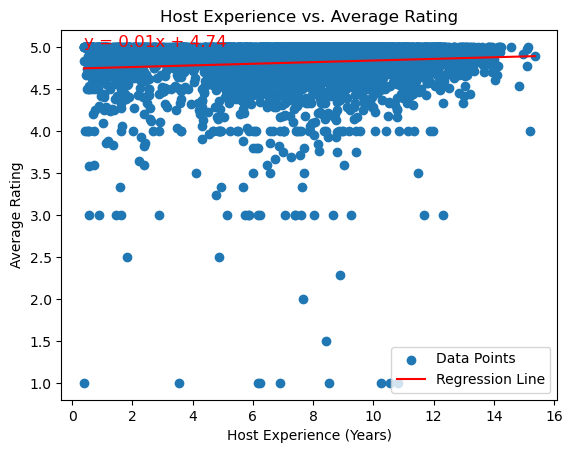

In [114]:
#Scatter plot: Host experience vs. Average rating

# Define Variables
X = host_data['host_experience_years']
Y = host_data['avg_rating']

# Calculate Regression Line
coefficients = np.polyfit(X, Y, 1)
poly = np.poly1d(coefficients)
regression_line = poly(X)

# Scatter Plot
plt.scatter(X, Y, label='Data Points')

# Regression Line
plt.plot(X, regression_line, color='red', label='Regression Line')

# Add equation to the plot
equation_text = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
plt.text(min(X), max(Y), equation_text, fontsize=12, color='red')

# Add labels and title
plt.xlabel('Host Experience (Years)')
plt.ylabel('Average Rating')
plt.title('Host Experience vs. Average Rating')
plt.legend()

# Save the plot to a file
output_path = 'plots/Scatter_showing_experience_vs_Ratings.png'
plt.savefig(output_path)
#Show plot
plt.show()

Correlation: 0.10, P-value: 0.00


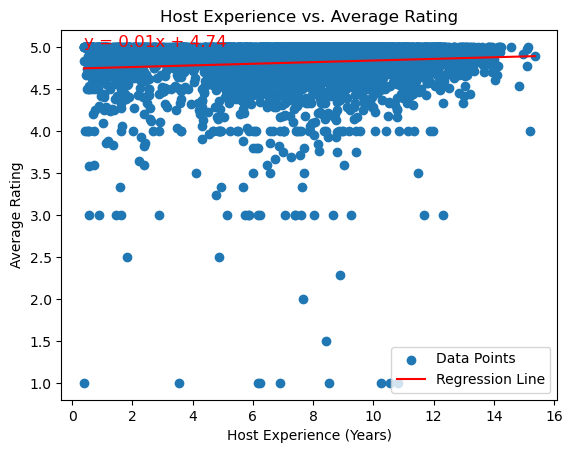

In [115]:
# Hypothesis Testing and statistical analysis
# Correlation analysis 

correlation, p_value = pearsonr(host_data['host_experience_years'], host_data['avg_rating'])
print(f'Correlation: {correlation:.2f}, P-value: {p_value:.2f}')

# Display the correlation coefficient and p-value on the plot
plt.scatter(X, Y, label='Data Points')

# Regression Line
plt.plot(X, regression_line, color='red', label='Regression Line')

# Add equation and correlation to the plot
equation_text = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
correlation_text = f'Correlation: {correlation:.2f}, P-value: {p_value:.2f}'
plt.text(min(X), max(Y), equation_text, fontsize=12, color='red')
#plt.text(min(X), max(Y) - 0.1, correlation_text, fontsize=12, color='blue')

# Add labels and title
plt.xlabel('Host Experience (Years)')
plt.ylabel('Average Rating')
plt.title('Host Experience vs. Average Rating')
plt.legend()

# Show plot with correlation information
plt.show()

The above presentation show that there is a weak positive correlation between average rating and host experience. The P Value of 3.888496808457316e-12 is exceedingly small, much smaller than 0.05, indicating that the correlation is statistically significant. Therefore, while there is some statistically significant positive correlation between average rating and host experience, the actual influence that host experience has on average rating is almost negligible.In practical terms, even though we have found a statistically significant correlation, the weak strength suggests that host experience may not have a strong impact on average ratings. Other factors might play a more crucial role in determining average ratings and should be explored.

In [116]:
#Calculate Top ten experience host
top_experienced_host = host_data.sort_values ("host_experience_years",ascending =False)
top_experienced_host.head(10)


,host_id,host_experience_years,num_listings,price,total_reviews,avg_rating
0,9082,15.361644,2,105.0,28,4.89
1,15565,15.202740,1,300.0,1,4.00
2,18785,15.139726,1,138.0,2,5.00
3,20588,15.101370,1,132.0,54,4.98
4,21345,15.087671,1,115.0,31,4.77
5,26687,14.983562,1,158.0,775,4.92
6,38901,14.827397,1,51.0,185,4.53
7,64240,14.572603,1,119.0,10,5.00
8,112497,14.230137,1,98.0,6,5.00
9,114878,14.213699,1,90.0,25,5.00


In [117]:
#Calculate Bottom ten experience host
top_experienced_host = host_data.sort_values ("host_experience_years")
top_experienced_host.head(10)

,host_id,host_experience_years,num_listings,price,total_reviews,avg_rating
5134,562614562,0.394521,1,136.0,1,5.000
5133,562487587,0.397260,1,312.0,1,1.000
5132,562103428,0.405479,2,75.0,2,5.000
5131,561798630,0.408219,1,157.0,5,5.000
5130,561797490,0.408219,1,368.0,3,5.000
5129,561780891,0.410959,1,211.0,1,5.000
5128,561627820,0.410959,2,162.0,4,4.835
5127,561267616,0.419178,1,77.0,3,5.000
5126,561111312,0.421918,1,296.0,1,4.000
5125,560626153,0.427397,1,90.0,4,5.000


T-statistic: -6.87, P-value: 0.00


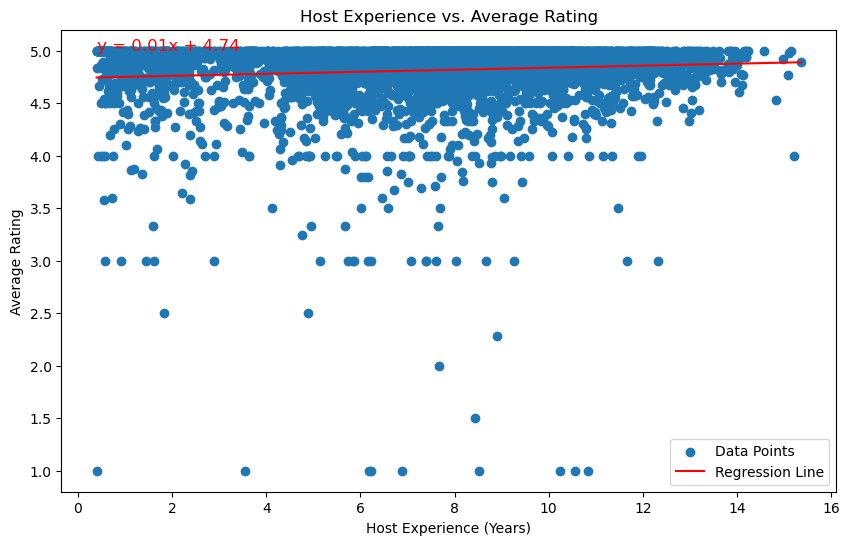

T-test Results: T-statistic: -6.87, P-value: 0.00


In [96]:
# Split the data into two groups based on host experience (e.g., <= 7.5 years and > 7.5 years)
group1 = host_data[host_data['host_experience_years'] <= 7.5]['avg_rating']
group2 = host_data[host_data['host_experience_years'] > 7.5]['avg_rating']

# Perform a t-test
t_stat, p_value = ttest_ind(group1, group2)
print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.2f}')

# Define Variables for correlation analysis and regression line
X = host_data['host_experience_years']
Y = host_data['avg_rating']

# Calculate Regression Line
coefficients = np.polyfit(X, Y, 1)
poly = np.poly1d(coefficients)
regression_line = poly(X)

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Data Points')

# Regression Line
plt.plot(X, regression_line, color='red', label='Regression Line')

# Add equation and correlation to the plot
equation_text = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
plt.text(min(X), max(Y), equation_text, fontsize=12, color='red')

# Perform Correlation Analysis
correlation, p_value_corr = pearsonr(X, Y)
correlation_text = f'Correlation: {correlation:.2f}, P-value: {p_value_corr:.2f}'
#plt.text(min(X), max(Y) - 0.1, correlation_text, fontsize=12, color='blue')

# Add labels and title
plt.xlabel('Host Experience (Years)')
plt.ylabel('Average Rating')
plt.title('Host Experience vs. Average Rating')
plt.legend()

# Show plot
plt.savefig('Scatter_Plot_with_Regression_and_Correlation.png')
plt.show()

# Output the results of the t-test
print(f'T-test Results: T-statistic: {t_stat:.2f}, P-value: {p_value:.2f}')

There is a substantial difference between the average ratings of the two groups (group1 and group2). The negative sign suggests that the average rating of the first group (host experience ≤ 7.5 years) is substantially lower than that of the second group (host experience > 7.5 years).

The P-value indicates the probability of observing a test statistic as extreme as, or more extreme than, the observed one if the null hypothesis (that the two group means are equal) is true. With a P-value reported as 0.00 (p < 0.001):

The result is highly statistically significant. There is strong evidence to reject the null hypothesis, which states that the means of the two groups are the same. These results suggest that there is a statistically significant difference between the average ratings of hosts with ≤ 7.5 years of experience and those with > 7.5 years of experience. Specifically:

Hosts with more than 7.5 years of experience tend to have higher average ratings compared to those with 7.5 years or less experience. Given the statistical significance (very low P-value), this difference is unlikely to be due to random chance.

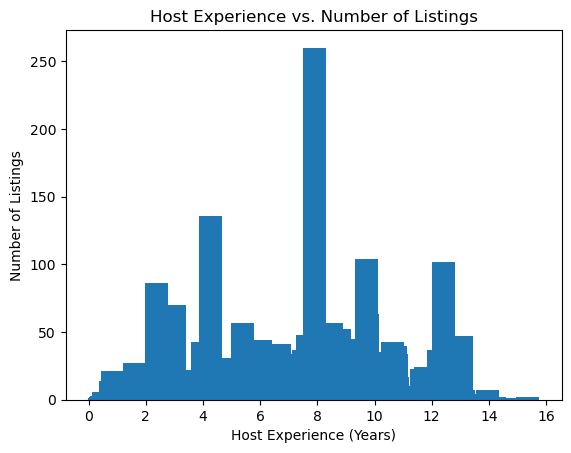

In [118]:
# Bar Chart showing number of listings per avarage rating
plt.bar(host_data['host_experience_years'], host_data['num_listings'])
plt.title('Host Experience vs. Number of Listings')
plt.xlabel('Host Experience (Years)')
plt.ylabel('Number of Listings')

# Save the plot to a file
output_path = 'plots/experience_vs_listings.png'
plt.savefig(output_path)

# Show the plot
plt.show()

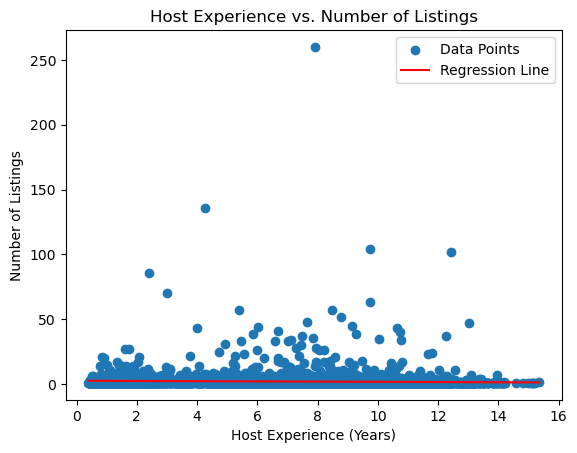

In [98]:
#Scatter plot: Host experience vs. Number of Listings

# Define Variables
X = host_data['host_experience_years']
Y = host_data ['num_listings']

#Calculate Regression line
coefficients = np.polyfit(X,Y, 1)
poly = np.poly1d(coefficients)
regression_line = poly (X)

#Scatter Plot
plt.scatter(X, Y, label='Data Points')

#Regression Line
plt.plot (X, regression_line, color = 'red', label = 'Regression Line')

#Add labels and tittle
plt.xlabel ('Host Experience (Years)')
plt.ylabel ('Number of Listings')
plt.title ('Host Experience vs. Number of Listings')
plt.legend()

# Save the plot to a file
output_path = 'plots/Scatter_showing_experience_vs_listings.png'
plt.savefig(output_path)
#Show plot
plt.show()

In [119]:
#Calculate correlation between 'price' and 'host_experience'
# Convert 'price' to numeric by stripping the '$' and converting to float
airbnb_data['price'] = airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)
correlation = airbnb_data['price'].corr(airbnb_data['host_experience_years'])

# Print correlation result
print(f"Correlation between price and host experince years: {correlation:.2f}")

Correlation between price and host experince years: 0.03


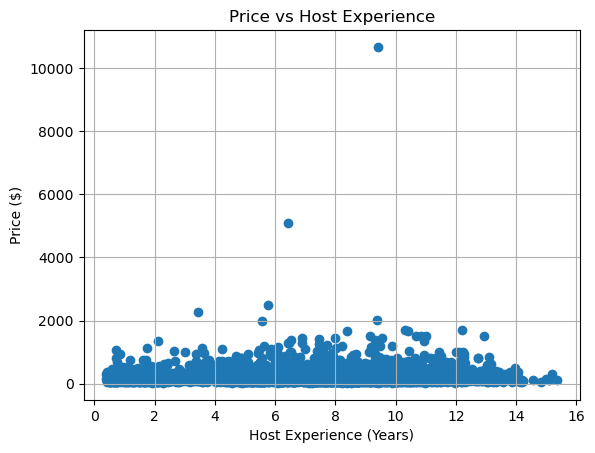

In [120]:
# Plot the relationship

plt.scatter(host_data['host_experience_years'], host_data['price'])
plt.title('Price vs Host Experience')
plt.xlabel('Host Experience (Years)')
plt.ylabel('Price ($)')
plt.grid(True)

# Save the plot to a file
output_path = 'plots/Scatter_Price_vs_Host_experience.png'
plt.savefig(output_path)
plt.show()

In [121]:
#Identify Outliers using IQR Method

Q1 = host_data['price'].quantile(0.25)
Q3 = host_data['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = host_data[(host_data['price'] < (Q1 - 1.5 * IQR)) | (host_data['price'] > (Q3 + 1.5 * IQR))]
print(outliers)

# Remove outliers
host_data_clean = host_data[~((host_data['price'] < (Q1 - 1.5 * IQR)) | (host_data['price'] > (Q3 + 1.5 * IQR)))]

        host_id  host_experience_years  num_listings   price  total_reviews  \
72       581252              13.175342             1   623.0            111   
84       677155              13.101370             1   839.0              6   
88       730414              13.063014             1   529.0              5   
89       747841              13.049315             1   602.0            128   
105      907869              12.950685             1  1500.0              1   
...         ...                    ...           ...     ...            ...   
4997  529628655               0.939726             1   542.0             14   
5019  535914326               0.843836             1   957.0              4   
5041  541588108               0.747945             1   693.0             14   
5043  542239609               0.734247             1   800.0              1   
5049  543515812               0.709589             1  1057.0              1   

      avg_rating  
72          4.76  
84          4

Correlation: 0.00, P-value: 0.83


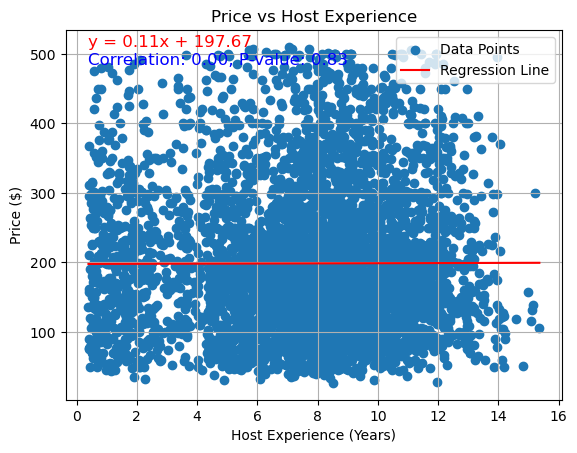

In [125]:
# Plot the relationship
X = airbnb_data_clean['host_experience_years'].values.reshape(-1, 1)
Y = airbnb_data_clean['price'].values

# Compute the Pearson correlation coefficient
correlation, p_value = pearsonr(airbnb_data_clean['host_experience_years'], airbnb_data_clean['price'])
print(f'Correlation: {correlation:.2f}, P-value: {p_value:.2f}')

# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Get predictions (regression line)
regression_line = model.predict(X)

# Plotting
plt.scatter(airbnb_data_clean['host_experience_years'], airbnb_data_clean['price'], label='Data Points')

# Add regression line to plot
plt.plot(airbnb_data_clean['host_experience_years'], regression_line, color='red', label='Regression Line')

# Add equation and correlation to the plot
coefficients = model.coef_
intercept = model.intercept_
equation_text = f'y = {coefficients[0]:.2f}x + {intercept:.2f}'
correlation_text = f'Correlation: {correlation:.2f}, P-value: {p_value:.2f}'
plt.text(min(airbnb_data_clean['host_experience_years']), max(airbnb_data_clean['price']), equation_text, fontsize=12, color='red')
plt.text(min(airbnb_data_clean['host_experience_years']), max(airbnb_data_clean['price']) * 0.95, correlation_text, fontsize=12, color='blue')

# Final plot 
plt.title('Price vs Host Experience')
plt.xlabel('Host Experience (Years)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()

# Save the plot to a file
output_path = 'plots/Scatter_Price_vs_Host_experience_2.png'
plt.savefig(output_path)
plt.show()

The above presentation show suggest that there is no correlation between price and host experience. Other variables may have a more significant impact on the price than host experience